## Comprehensive clustering ML and DL analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import hdbscan

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from minisom import MiniSom
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

## Data Preprocessing: 

The dataset is cleaned by removing irrelevant columns (CustomerID, Genre) and scaled using StandardScaler for clustering.

In [2]:

# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Basic EDA
print(df.head())
print(df.info())
print(df.describe())

# Drop non-numeric and irrelevant features
df_clean = df.drop(['CustomerID', 'Gender'], axis=1)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [22]:
print(df_clean.head())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


In [3]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)


C:\Users\india\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\india\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


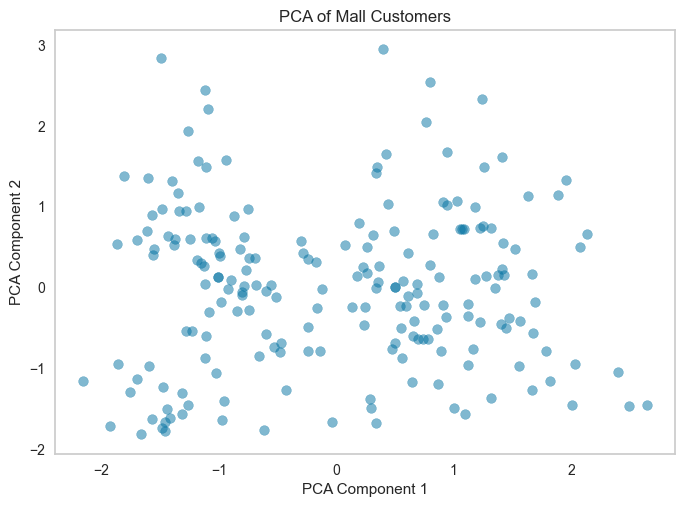

In [4]:

# Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_scaled)
umap_embed = umap.UMAP(n_components=2, random_state=42).fit_transform(X_scaled)


# Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA of Mall Customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()


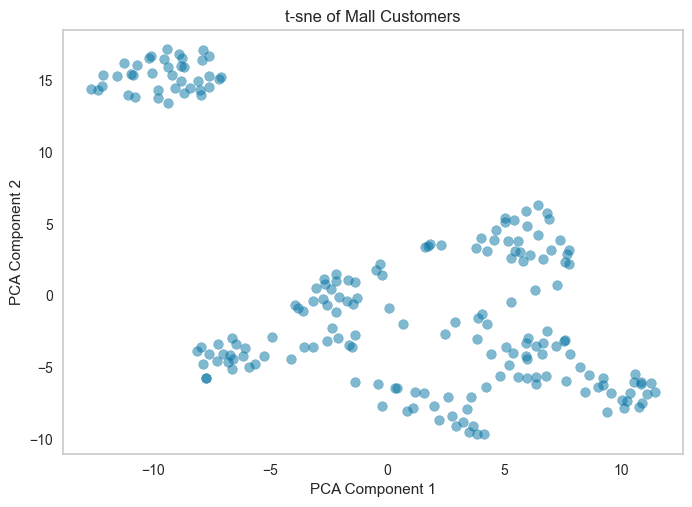

In [5]:
# Plot t-sne results
plt.scatter(tsne[:, 0], tsne[:, 1], alpha=0.5)
plt.title('t-sne of Mall Customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()

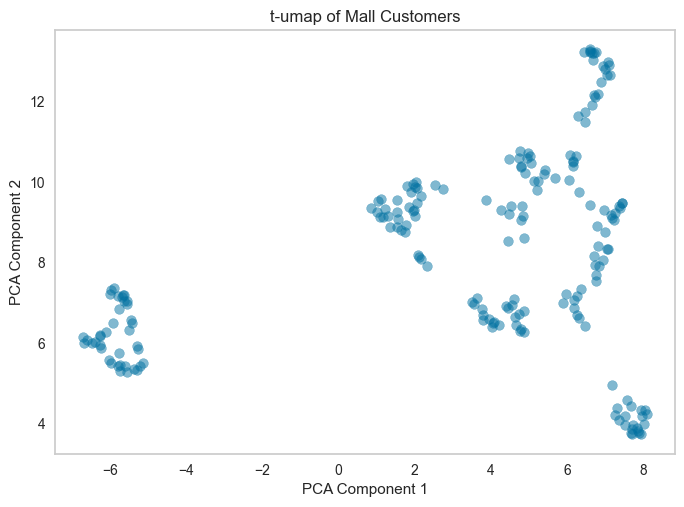

In [6]:
# Plot t-umap results
plt.scatter(umap_embed[:, 0], umap_embed[:, 1], alpha=0.5)
plt.title('t-umap of Mall Customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()

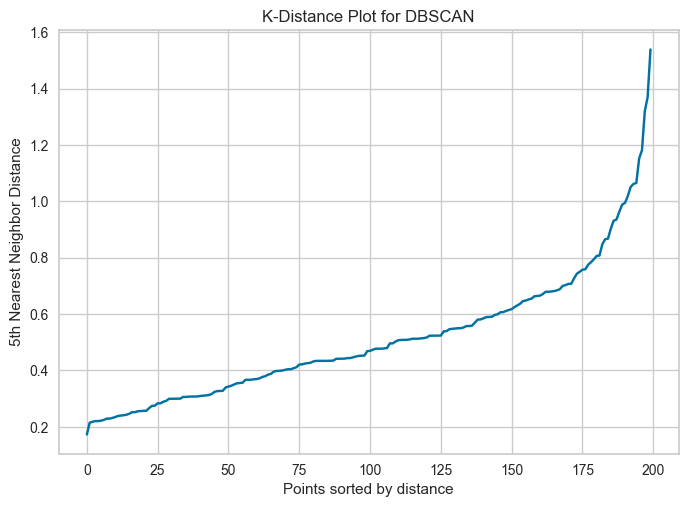

In [7]:
# K-Distance plot to find optimal eps
k = 5  # usually equals min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
k_distances = np.sort(distances[:, k-1])

# Plot k-distance graph
#plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title('K-Distance Plot for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


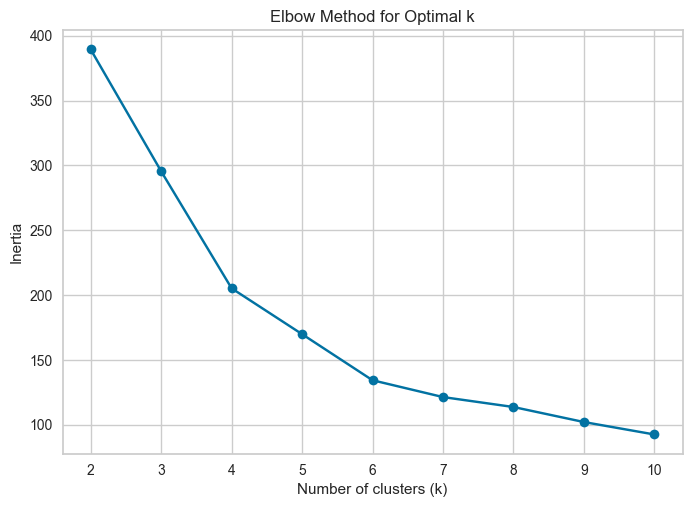

In [8]:
# KMeans Clustering
inertia = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot silhouette scores for each k
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


--- KMeans Clustering ---


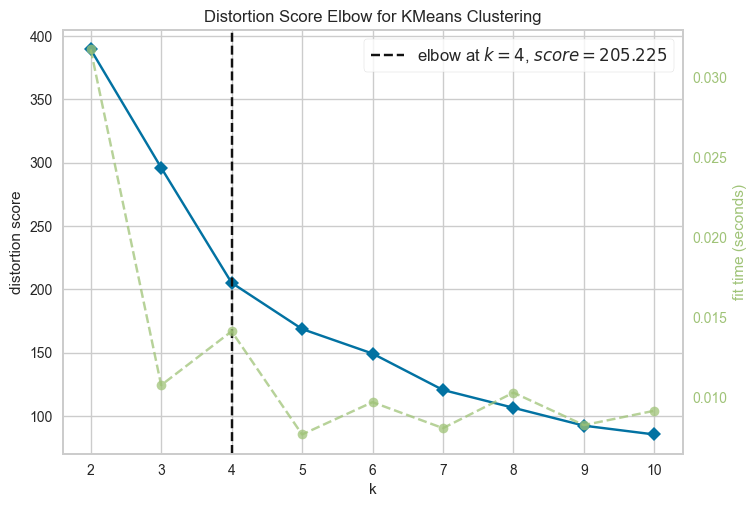

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
print("\n--- KMeans Clustering ---")
elbow_model = KElbowVisualizer(KMeans(), k=(2,11 ))
elbow_model.fit(X_scaled)
elbow_model.show()

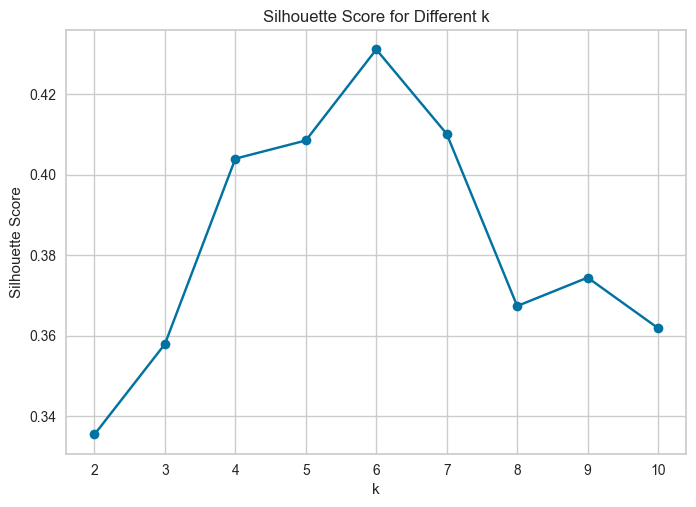

In [10]:
# Evaluate different k values based on silhouette score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, kmeans_labels))

# Plot silhouette scores for each k
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score for Different k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [11]:
# Select the best k based on the highest silhouette score
best_k = np.argmax(sil_scores) + 2  # +2 because k starts from 2
print(f"Best k based on silhouette score: {best_k}")

Best k based on silhouette score: 6


## Clustering Methods:

Traditional Clustering: We first apply KMeans, DBSCAN, and AgglomerativeClustering on the scaled dataset.

1. The Elbow Method is used to determine the optimal number of clusters for KMeans, followed by visualization of the clusters using PCA for dimensionality reduction.
2. DBSCAN and Agglomerative Clustering are applied directly, with evaluations using Silhouette Score and Davies-Bouldin Index.

Dendrogram is plotted for Agglomerative Clustering.

In [12]:
# ------------------------------------------------------------
# Traditional Clustering Methods (KMeans, DBSCAN, Agglomerative)
# ------------------------------------------------------------
import pandas as pd

results = []

# Silhouette Helper
def evaluate_clustering(name, X, labels):
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    # Ensure labels are 1D arrays
    ar = adjusted_rand_score(labels.flatten(), labels.flatten())
    nm = normalized_mutual_info_score(labels.flatten(), labels.flatten())
    #print(f"Silhouette Score: {sil:.3f},Davies-Bouldin Index: {db:.3f},Calinski-Harabasz Index: {ch:.3f},Adjusted Rand Index: {ar:.3f},Normalized Mutual Information: {nm:.3f}")
    results.append({
        "Method": name,
        "Silhouette": round(sil, 3),
        "DBI": round(db, 3),
        "CHI": round(ch, 3),
        "ARI": round(ar, 3),
        "NMI": round(nm, 3)
    })

# KMeans Clustering
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
evaluate_clustering("KMeans", X_scaled, kmeans_labels)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=best_k)
dbscan_labels = dbscan.fit_predict(X_scaled)
evaluate_clustering("DBSCAN", X_scaled, dbscan_labels)

# Agglomerative Clustering with different linkage methods
for method in ['ward', 'complete', 'average', 'single']:
    agglo = AgglomerativeClustering(n_clusters=best_k, linkage=method)
    agglo_labels = agglo.fit_predict(X_scaled)
    evaluate_clustering(f"Agglo ({method})", X_scaled, dbscan_labels)

# --- Gaussian Mixture Model (GMM) for Clustering ---
gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
evaluate_clustering("GMM", X_scaled, gmm_labels)

# --- HDBSCAN for Clustering ---
clusterer = hdbscan.HDBSCAN(min_cluster_size=best_k)
hdb_labels = clusterer.fit_predict(X_scaled)
evaluate_clustering("HDBSCAN", X_scaled, hdb_labels)

# Self-Organizing Maps (SOM)
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 100)
win_map = np.array([som.winner(x) for x in X_scaled])
som_labels = np.array([10*x + y for x, y in win_map])
evaluate_clustering("SOM",X_scaled, som_labels)

# After running all clustering methods
df_results = pd.DataFrame(results)
print("\nClustering Performance Metrics:\n")
print(df_results.to_string(index=False))


Clustering Performance Metrics:

          Method  Silhouette   DBI     CHI  ARI  NMI
          KMeans       0.431 0.835 134.475  1.0  1.0
          DBSCAN       0.207 1.723  38.120  1.0  1.0
    Agglo (ward)       0.207 1.723  38.120  1.0  1.0
Agglo (complete)       0.207 1.723  38.120  1.0  1.0
 Agglo (average)       0.207 1.723  38.120  1.0  1.0
  Agglo (single)       0.207 1.723  38.120  1.0  1.0
             GMM       0.400 0.893 113.699  1.0  1.0
         HDBSCAN       0.113 1.576  28.537  1.0  1.0
             SOM       0.130 0.772  49.216  1.0  1.0


C:\Users\india\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\india\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


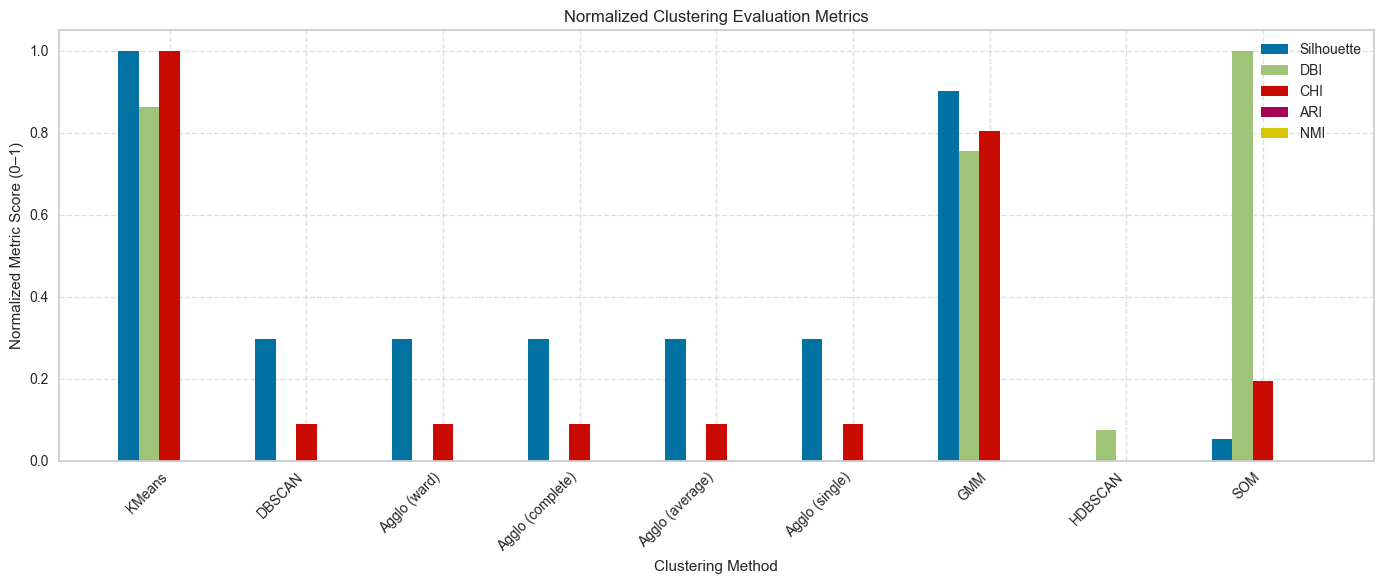

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def plot_clustering_results_normalized(results):
    df = pd.DataFrame(results)
    metrics = ['Silhouette', 'DBI', 'CHI', 'ARI', 'NMI']

    # Normalize metrics (except DBI, which is better when lower — so invert it)
    df_norm = df.copy()
    df_norm['DBI'] = 1 / (df_norm['DBI'] + 1e-10)  # Avoid division by zero

    scaler = MinMaxScaler()
    df_norm[metrics] = scaler.fit_transform(df_norm[metrics])

    # Plotting
    x = np.arange(len(df_norm['Method']))
    width = 0.15

    fig, ax = plt.subplots(figsize=(14, 6))
    
    for i, metric in enumerate(metrics):
        ax.bar(x + i * width, df_norm[metric], width, label=metric)

    ax.set_xlabel('Clustering Method')
    ax.set_ylabel('Normalized Metric Score (0–1)')
    ax.set_title('Normalized Clustering Evaluation Metrics')
    ax.set_xticks(x + width * 2)
    ax.set_xticklabels(df['Method'], rotation=45, ha='right')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# Then call the function like this after collecting results
plot_clustering_results_normalized(results)


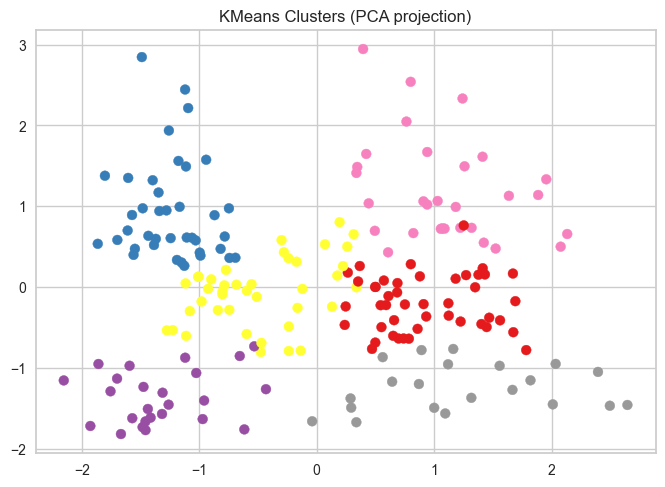

In [14]:
# Plot KMeans clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set1', s=50)
plt.title('KMeans Clusters (PCA projection)')
plt.show()

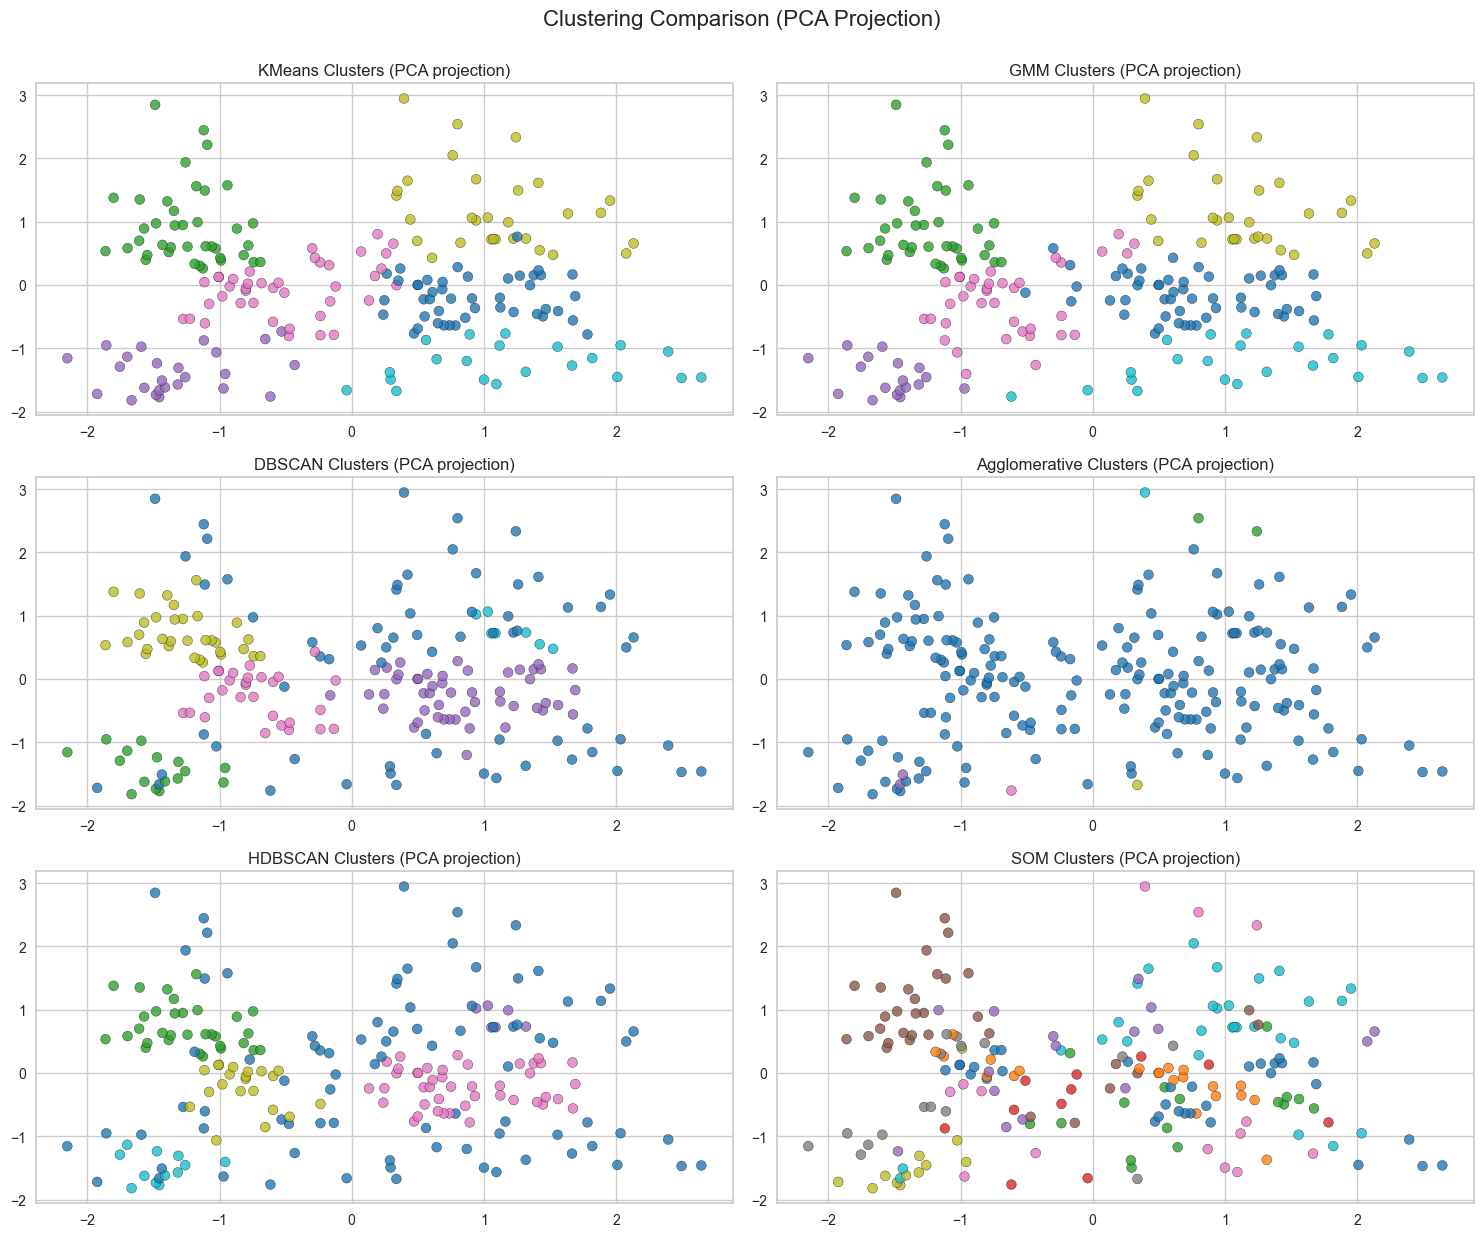

In [15]:
import matplotlib.pyplot as plt

# Clustering methods and their labels
methods = [
    ('KMeans', kmeans_labels),
    ('GMM', gmm_labels),
    ('DBSCAN', dbscan_labels),
    ('Agglomerative', agglo_labels),
    ('HDBSCAN', hdb_labels),
    ('SOM', som_labels)
]

# Plot
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for ax, (name, labels) in zip(axes, methods):
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50, alpha=0.8, edgecolors='k')
    ax.set_title(name + ' Clusters (PCA projection)')
    ax.grid(True)

# Tight layout and shared color bar (optional)
plt.tight_layout()
plt.suptitle("Clustering Comparison (PCA Projection)", fontsize=16, y=1.03)
plt.show()


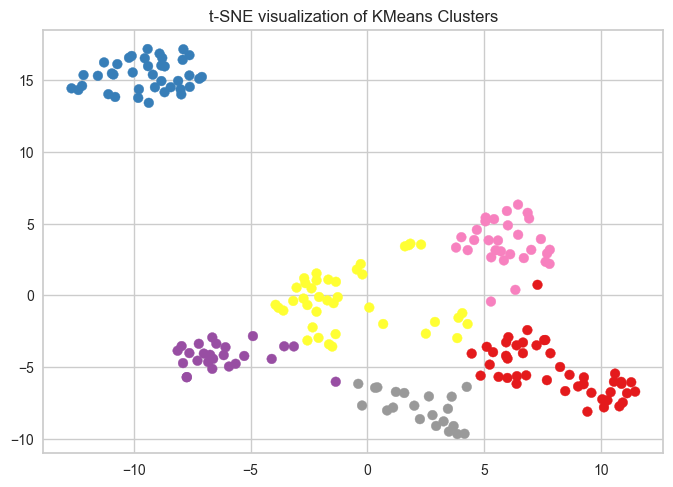

In [16]:
# --- t-SNE Visualization for Cluster Separation ---
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='Set1')
plt.title("t-SNE visualization of KMeans Clusters")
plt.show()

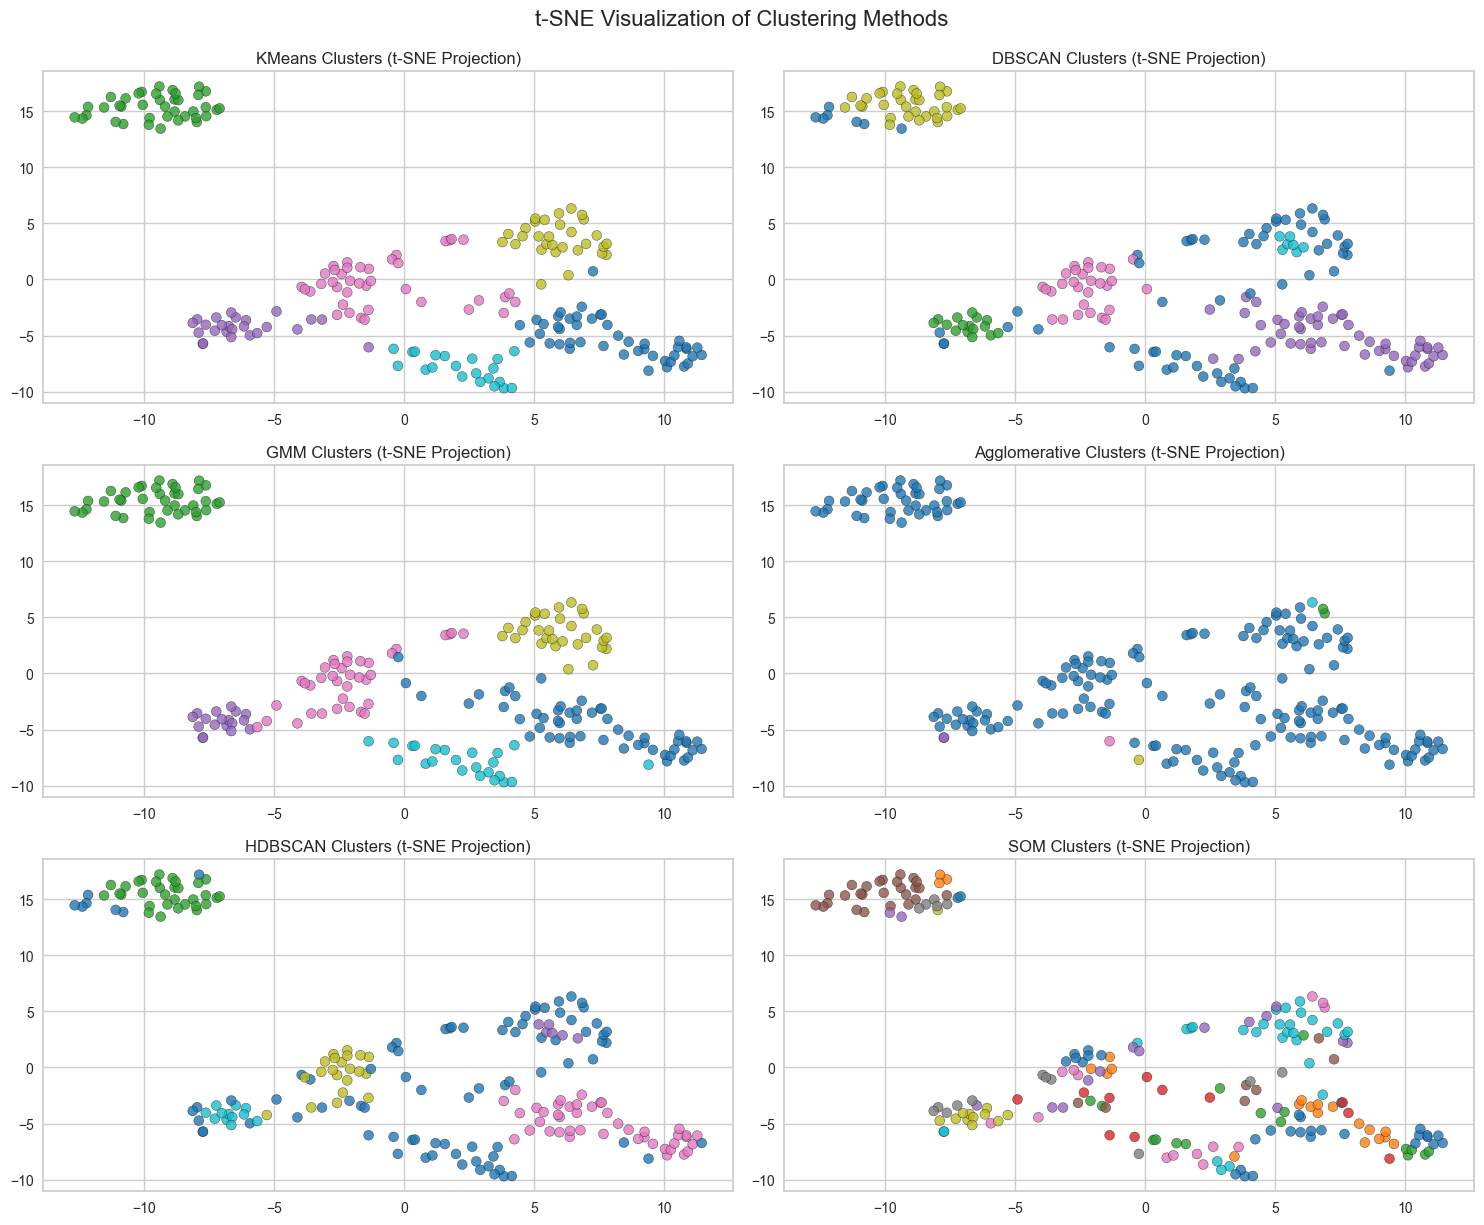

In [17]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# --- Compute t-SNE projection ---
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate='auto')
X_tsne = tsne.fit_transform(X_scaled)

# Clustering results to visualize
methods = [
    ('KMeans', kmeans_labels),
    ('DBSCAN', dbscan_labels),
    ('GMM', gmm_labels),
    ('Agglomerative', agglo_labels),
    ('HDBSCAN', hdb_labels),
    ('SOM', som_labels)
]

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for ax, (name, labels) in zip(axes, methods):
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=50, alpha=0.8, edgecolors='k')
    ax.set_title(f"{name} Clusters (t-SNE Projection)")
    ax.grid(True)

plt.tight_layout()
plt.suptitle("t-SNE Visualization of Clustering Methods", fontsize=16, y=1.02)
plt.show()


C:\Users\india\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\india\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


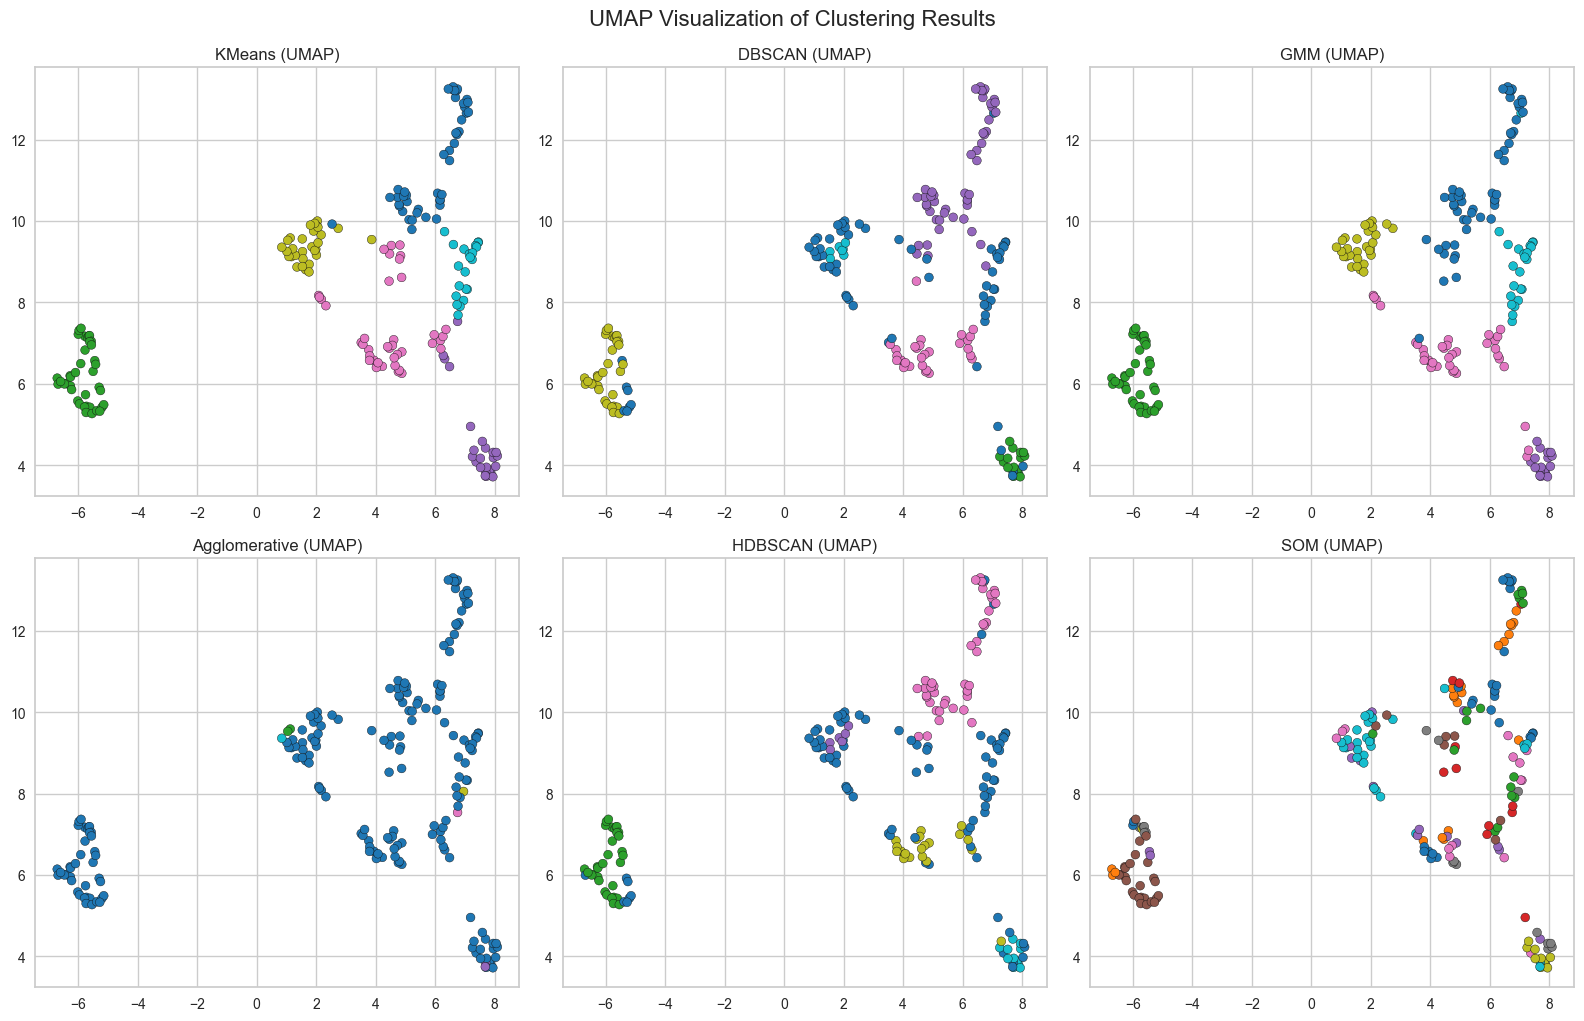

In [18]:
# UMAP embedding
X_umap = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(X_scaled)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, (name, labels) in enumerate(methods):
    axes[i].scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=40, edgecolors='k')
    axes[i].set_title(f"{name} (UMAP)")
    axes[i].grid(True)

plt.tight_layout()
plt.suptitle("UMAP Visualization of Clustering Results", fontsize=16, y=1.02)
plt.show()


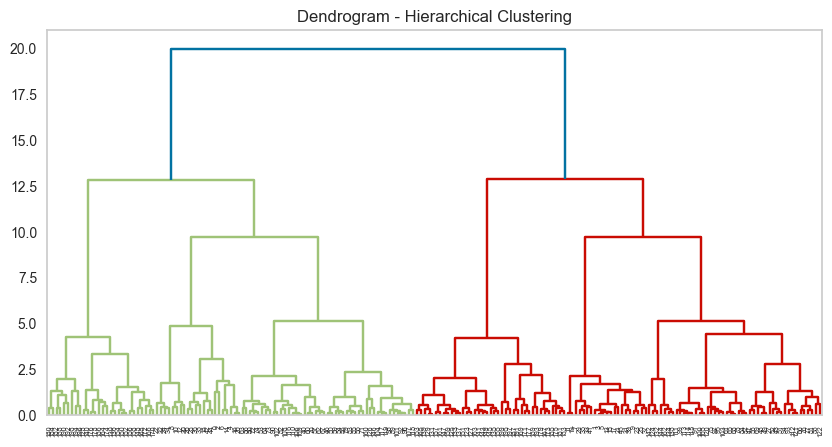

In [19]:

# Dendrogram for Agglomerative
plt.figure(figsize=(10, 5))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title("Dendrogram - Hierarchical Clustering")
plt.grid(False)
plt.show()


## Deep Learning Clustering (Autoencoder + KMeans):

An Autoencoder is built to reduce the dimensions of the data, using two layers for encoding and decoding. The encoded data is then clustered using KMeans. Clustering results are evaluated and visualized on the encoded (lower-dimensional) data.

In [20]:
# ------------------------------------------------------------
# Deep Learning-Based Clustering (Autoencoder + KMeans)
# ------------------------------------------------------------

# Build Autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(4, activation='relu')(encoded)
bottleneck = Dense(encoding_dim, activation='linear')(encoded)
decoded = Dense(4, activation='relu')(bottleneck)
decoded = Dense(8, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, output_layer)
encoder = Model(input_layer, bottleneck)

autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, shuffle=True, verbose=0)

# Encode data using autoencoder
X_encoded = encoder.predict(X_scaled)

# KMeans on encoded data
kmeans_dl = KMeans(n_clusters=best_k, random_state=42)
kmeans_dl_labels = kmeans_dl.fit_predict(X_encoded)

# Evaluate clustering
evaluate_clustering("Deep learning", X_encoded, kmeans_dl_labels)



7/7 [==============================] - 0s 0s/step


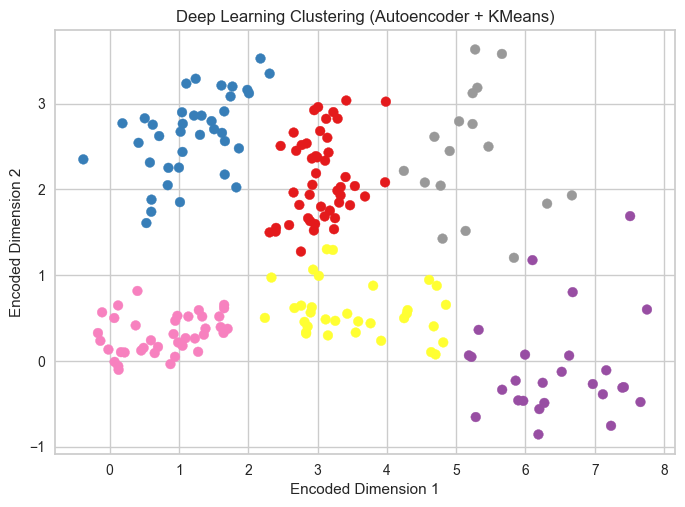

In [21]:
# Visualize Deep Learning Clustering
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=kmeans_dl_labels, cmap='Set1')
plt.title("Deep Learning Clustering (Autoencoder + KMeans)")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.grid(True)
plt.show()